#Step 1: Bring in the Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Read the Iris dataset into a Pandas DataFrame.
iris_df = pd.read_csv("https://www.alvinang.sg/s/iris_dataset.csv")

# Create a LabelEncoder object.
le = LabelEncoder()

# Target
y = le.fit_transform(iris_df["species"])

# Features
X = iris_df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]



---



#Step 2: View the Summary Report

In [2]:
from statsmodels.api import OLS
OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1267.
Date:                Sun, 30 Jul 2023   Prob (F-statistic):                   3.16e-112
Time:                        06:57:43   Log-Likelihood:                          17.013
No. Observations:                 150   AIC:                                     -26.03
Df Residuals:                     146   BIC:                                     -13.98
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sepal_length    -0.0815      0.049     -1.654      0.100      -0.179       0.016
sepal_width     -0.0272      0.057     -0.476      0.635      -0.140       0.086
petal_length     0.2232      0.057      3.928      0.000       0.111       0.336
petal_width      0.5997      0.094      6.393      0.000       0.414       0.785
==============================================================================
Omnibus:                        0.374   Durbin-Watson:                   1.143
Prob(Omnibus):                  0.829   Jarque-Bera (JB):                0.122
Skew:                          -0.026   Prob(JB):                        0.941
Kurtosis:                       3.129   Cond. No.                         51.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



---



#Step 3: Extract only the P Values

In [3]:
p = pd.DataFrame((OLS(y,X).fit().pvalues), columns = ["P-value"] ).\
              sort_values(by="P-value", ascending=True)
p

#we see that only petal width and petal length are the imporant features
#to determine the flower type

,P-value
petal_width,2.065019e-09
petal_length,1.314555e-04
sepal_length,1.003061e-01
sepal_width,6.347898e-01


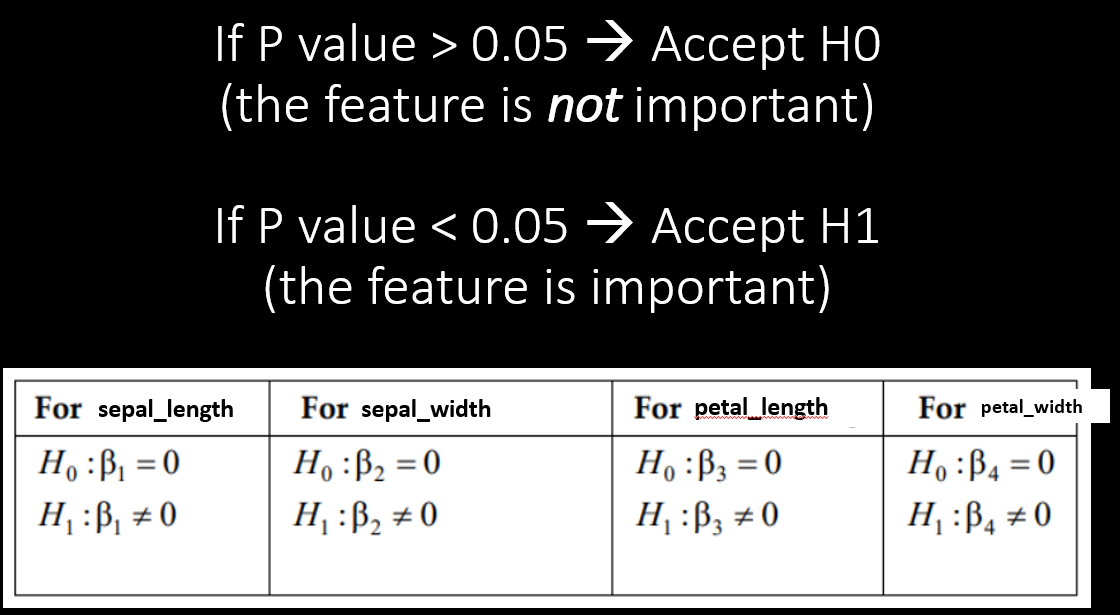



---



#Step 4: Create a Combined df

In [4]:
combined_df = pd.concat([iris_df, pd.DataFrame({"target": y})], axis=1)
combined_df = combined_df.drop("species", axis=1)
combined_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2




---



#Step 5: Plot and Analyze the Linear Regression Lines

Sepal Width P-value: 0.6347898421899811
Sepal Length P-value: 0.10030607325788099
Petal Length P-value: 0.0001314554687173045
Petal Width P-value: 2.0650194698530144e-09


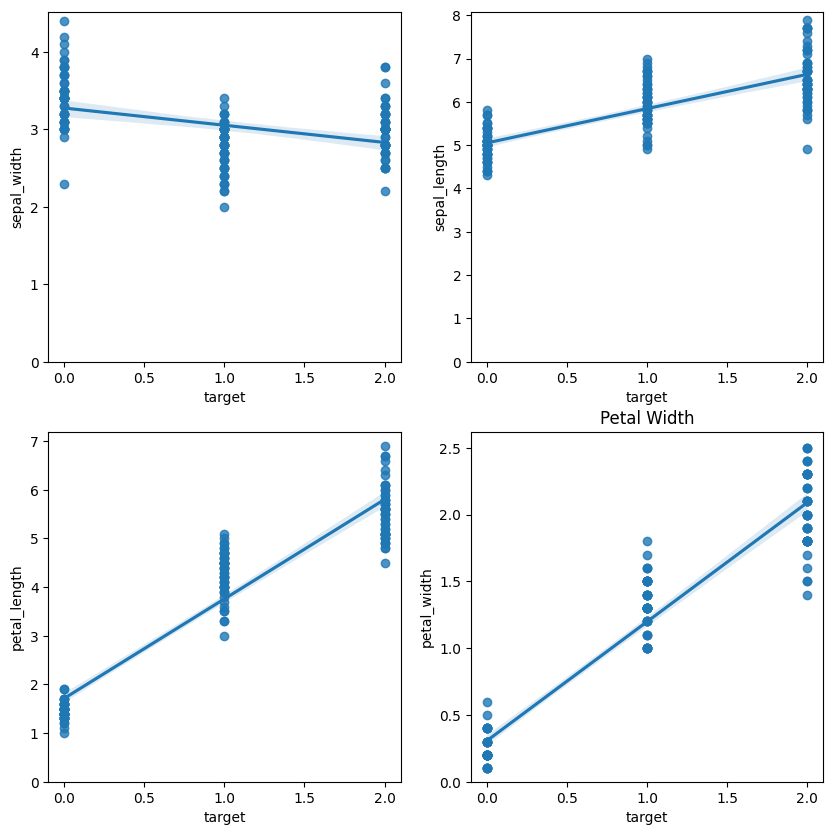

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot Sepal Width
sns.regplot(x='target', y='sepal_width', data=combined_df, ax=axes[0, 0])
axes[0, 0].set_ylim(0,)
plt.title('Sepal Width')

# Plot Sepal Length
sns.regplot(x='target', y='sepal_length', data=combined_df, ax=axes[0, 1])
axes[0, 1].set_ylim(0,)
plt.title('Sepal Length')

# Plot Petal Length
sns.regplot(x='target', y='petal_length', data=combined_df, ax=axes[1, 0])
axes[1, 0].set_ylim(0,)
plt.title('Petal Length')

# Plot Petal Width
sns.regplot(x='target', y='petal_width', data=combined_df, ax=axes[1, 1])
axes[1, 1].set_ylim(0,)
plt.title('Petal Width')

# Print the p values
print('Sepal Width P-value:', p['P-value'].loc['sepal_width'])
print('Sepal Length P-value:', p['P-value'].loc['sepal_length'])
print('Petal Length P-value:', p['P-value'].loc['petal_length'])
print('Petal Width P-value:', p['P-value'].loc['petal_width'])

plt.show()




---



#Step 6: Plotting out Feature Importance

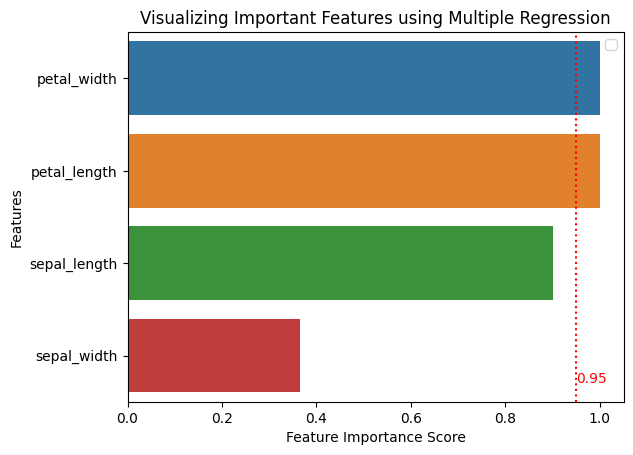

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Creating a bar plot
sns.barplot(x = 1-p['P-value'], y = p.index)

plt.axvline(x=0.95, color='r', linestyle='dotted')
plt.annotate('0.95', xy=(0.95, 3.3), xycoords='data', color='r')


#Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features using Multiple Regression')
plt.legend()
plt.show()

In [7]:
#we see that only petal width and petal length (that cross 0.95)
#are the important features... the rest are not important



---

#THE END


---

